In [1]:
%load_ext autoreload
%autoreload 2

### Reproducibility statement

This notebook relies on data generated by code in the `l5pc` folder. In particular, we will simply load from file the following objects or datasets:
- TSNPE posteriors after the first round and final round
- 1000 prior samples and prior predictives (in order to run SBCC after round 1)
- the observed data $x_o$

### Code

In [2]:
from l5pc.utils.simulation_utils import assemble_prior, assemble_simulator
import dill
import pickle
import torch
from l5pc.model import (
    Priorl5pc,
    simulate_l5pc,
    setup_l5pc,
    summstats_l5pc,
    setup_l5pc,
)
from os.path import join
from sbi.analysis import pairplot
from l5pc.model.utils import return_gt, return_x_names, return_names
import numpy as np
from torch import as_tensor, ones, zeros, eye, float32
from l5pc.utils.common_utils import load_posterior
from l5pc.model.utils import return_gt, return_names, return_xo
from sbi.utils import BoxUniform
from sbi.utils.support_posterior import PosteriorSupport
from omegaconf import DictConfig
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


from l5pc.utils.common_utils import (
    load_prior,
    extract_bounds,
    load_posterior,
)
from l5pc.utils.evaluation_utils import (
    predictive_traces,
    plot_traces,
    plot_summstats,
    compare_gt_log_probs,
    gt_log_prob,
    coverage,
    plot_coverage,
)

Connecting mdeistler@134.2.168.111:3306


In [3]:
setup_l5pc()

Loading neuron libraries
Successfully loaded libraries!


## Panel A

## Panel B

In [13]:
theta = return_gt()

In [14]:
trace = simulate_l5pc(theta)

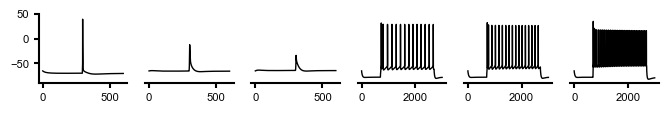

In [25]:
with mpl.rc_context(fname="../../../paper/.matplotlibrc"):
    fig, ax = plt.subplots(1, 6, figsize=(8, 0.9))
    ax[0].plot(trace[0]['bAP.soma.v']["time"], trace[0]['bAP.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1].plot(trace[0]['bAP.dend1.v']["time"], trace[0]['bAP.dend1.v']["voltage"], c="k", linewidth=1.0)
    ax[2].plot(trace[0]['bAP.dend2.v']["time"], trace[0]['bAP.dend2.v']["voltage"], c="k", linewidth=1.0)
    ax[3].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[4].plot(trace[0]['Step2.soma.v']["time"], trace[0]['Step2.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[5].plot(trace[0]['Step3.soma.v']["time"], trace[0]['Step3.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for i in range(6):
        # ax[i].set_xticks([])
        ax[i].set_ylim([-90, 50])
        
    for i in range(1, 6):
        # ax[i].set_xticks([])
        ax[i].set_ylim([-90, 50])
        ax[i].set_yticks([])
        ax[i].set_yticklabels([])
        ax[i].spines["left"].set_visible(False)
        
    plt.savefig("../svg/panel_b.svg")

## Panel C

In [26]:
prior = assemble_prior(DictConfig({"model": {"name": "l5pc", "num_params": 20, "prior": [[]]}}))

In [27]:
_ = torch.manual_seed(0)
theta = prior.sample((1,))
trace = simulate_l5pc(theta)

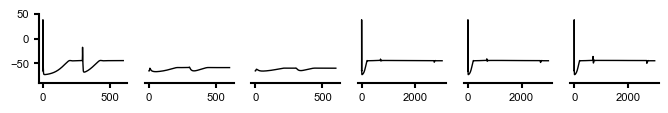

In [28]:
with mpl.rc_context(fname="../../../paper/.matplotlibrc"):
    fig, ax = plt.subplots(1, 6, figsize=(8, 0.9))
    ax[0].plot(trace[0]['bAP.soma.v']["time"], trace[0]['bAP.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1].plot(trace[0]['bAP.dend1.v']["time"], trace[0]['bAP.dend1.v']["voltage"], c="k", linewidth=1.0)
    ax[2].plot(trace[0]['bAP.dend2.v']["time"], trace[0]['bAP.dend2.v']["voltage"], c="k", linewidth=1.0)
    ax[3].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[4].plot(trace[0]['Step2.soma.v']["time"], trace[0]['Step2.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[5].plot(trace[0]['Step3.soma.v']["time"], trace[0]['Step3.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for i in range(6):
        # ax[i].set_xticks([])
        ax[i].set_ylim([-90, 50])
        
    for i in range(1, 6):
        # ax[i].set_xticks([])
        ax[i].set_ylim([-90, 50])
        ax[i].set_yticks([])
        ax[i].set_yticklabels([])
        ax[i].spines["left"].set_visible(False)
        
    plt.savefig("../svg/panel_c.svg")

In [29]:
_ = torch.manual_seed(1)
theta = posterior.sample((1,))
theta = pd.DataFrame(theta.numpy(), columns=return_names())
trace = simulate_l5pc(theta)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

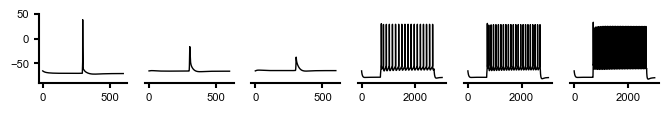

In [30]:
with mpl.rc_context(fname="../../../paper/.matplotlibrc"):
    fig, ax = plt.subplots(1, 6, figsize=(8, 0.9))
    ax[0].plot(trace[0]['bAP.soma.v']["time"], trace[0]['bAP.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1].plot(trace[0]['bAP.dend1.v']["time"], trace[0]['bAP.dend1.v']["voltage"], c="k", linewidth=1.0)
    ax[2].plot(trace[0]['bAP.dend2.v']["time"], trace[0]['bAP.dend2.v']["voltage"], c="k", linewidth=1.0)
    ax[3].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[4].plot(trace[0]['Step2.soma.v']["time"], trace[0]['Step2.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[5].plot(trace[0]['Step3.soma.v']["time"], trace[0]['Step3.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for i in range(6):
        ax[i].set_ylim([-90, 50])
        
    for i in range(1, 6):
        ax[i].set_ylim([-90, 50])
        ax[i].set_yticks([])
        ax[i].set_yticklabels([])
        ax[i].spines["left"].set_visible(False)
        
    plt.savefig("../svg/panel_e.svg")

### Plot posterior

In [8]:
inference, posterior, used_features, round_ = load_posterior("l20_7", "2022_05_08__08_59_11_snpe")

In [9]:
prior_bounds = extract_bounds(prior).T.numpy()

In [10]:
all_labels = []
for dim_i in range(4):
    labels = [prior_bounds[dim_i, num_tmp] for num_tmp in range(2)]
    new_labels = []
    counter = 0
    for l in labels:
        if counter == 0:
            new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$  ')
        else:
            new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$   ')
        counter+=1
    all_labels.append(new_labels)

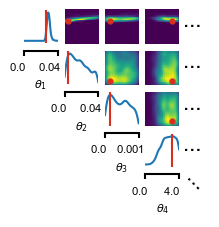

In [12]:
_ = torch.manual_seed(0)
posterior_samples = posterior.sample((1000,), show_progress_bars=False)
with mpl.rc_context(fname="../../../paper/.matplotlibrc"):
    _ = pairplot(
        posterior_samples,
        limits=prior_bounds,
        subset=[0, 1, 2, 3],
        upper=["kde"],
        diag=["kde"],
        ticks=prior_bounds,
        figsize=(2,2),
        labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$"],
        tick_labels=all_labels,
        points=return_gt(as_pd=False),
        points_colors=["#d7301f"],
        points_offdiag={"markersize": 7}
    )
    plt.savefig("../svg/panel_d.svg")

## Panel F

In [32]:
_ = torch.manual_seed(1)
theta = posterior.sample((3,))
theta = pd.DataFrame(theta.numpy(), columns=return_names())
trace = simulate_l5pc(theta, protocol_subset=["Step1"])

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

Drawing 2 posterior samples:   0%|          | 0/2 [00:00<?, ?it/s]

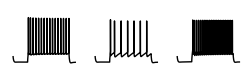

In [33]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 3, figsize=(3, 0.75))
    ax[0].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1].plot(trace[1]['Step1.soma.v']["time"], trace[1]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[2].plot(trace[2]['Step1.soma.v']["time"], trace[2]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for j in range(3):
        ax[j].set_xticks([])
        ax[j].set_ylim([-90, 50])
        ax[j].set_yticks([])
        ax[j].set_yticklabels([])
        ax[j].spines["left"].set_visible(False)
        ax[j].spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_e.svg")

## Panel G

In [34]:
_ = torch.manual_seed(7)
theta = posterior.sample((1,))
theta = pd.DataFrame(theta.numpy(), columns=return_names())
trace = simulate_l5pc(theta)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

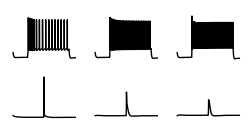

In [35]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 3, figsize=(3, 1.5))
    ax[1, 0].plot(trace[0]['bAP.soma.v']["time"], trace[0]['bAP.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1, 1].plot(trace[0]['bAP.dend1.v']["time"], trace[0]['bAP.dend1.v']["voltage"], c="k", linewidth=1.0)
    ax[1, 2].plot(trace[0]['bAP.dend2.v']["time"], trace[0]['bAP.dend2.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 0].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 1].plot(trace[0]['Step2.soma.v']["time"], trace[0]['Step2.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 2].plot(trace[0]['Step3.soma.v']["time"], trace[0]['Step3.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for i in range(2):
        for j in range(3):
            ax[i, j].set_xticks([])
            ax[i, j].set_ylim([-90, 50])
            ax[i, j].set_yticks([])
            ax[i, j].set_yticklabels([])
            ax[i, j].spines["left"].set_visible(False)
            ax[i, j].spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_f.svg")

In [36]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [60]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("15.7cm", "9.3cm",

    Panel(
          SVG("../svg/panel_a.svg").scale(svg_scale).move(0, 0),
          Text("a", -50, -8.0, **kwargs_text),
        Text("Morphology", -14, -8.0, **kwargs_text8pt),
    ).move(50, 20),
    Panel(
          SVG("../svg/panel_b.svg").scale(svg_scale).move(0, 0),
        Text("Step 1", 29, 13.0, **kwargs_text8pt),
        Text("Step 2", 102, 13.0, **kwargs_text8pt),
        Text("Step 3", 177, 13.0, **kwargs_text8pt),
        Text("bAP soma", 19, 68.0, **kwargs_text8pt),
        Text("bAP dend. 1", 82, 68.0, **kwargs_text8pt),
        Text("bAP dend. 2", 160, 68.0, **kwargs_text8pt),
        Text("Observation", 90, -1.0, **kwargs_text8pt),
        Text("b", -0, -1.0, **kwargs_text),
    ).move(140, 13),
    Panel(
          SVG("../svg/panel_c.svg").scale(svg_scale).move(0, 0),
          Text("c", -10, -1.0, **kwargs_text),
        Text("Four Prior predictives for Step 1", 7, -1.0, **kwargs_text8pt),
    ).move(440, 13),
    Panel(
          SVG("../svg/panel_c1.svg").scale(svg_scale).move(0, 0),
          Text("d", -15, 16.0, **kwargs_text),
    ).move(15, 137),
    Panel(
          SVG("../svg/panel_c2.svg").scale(svg_scale).move(0, 0),
    ).move(0, 230),
    Panel(
          SVG("../svg/panel_d.svg").scale(svg_scale).move(0, 0),
          Text("e", 0, 3.0, **kwargs_text),
        Text("Posterior distribution", 50, 3.0, **kwargs_text8pt),
    ).move(140, 150),
    Panel(
          SVG("../svg/panel_e.svg").scale(svg_scale).move(0, 0),
          Text("f", 0, 4.0, **kwargs_text),
        Text("Three Posterior predictives for Step 1", 30, 4.0, **kwargs_text8pt),
    ).move(370, 149),
    Panel(
          SVG("../svg/panel_f.svg").scale(svg_scale).move(0, 0),
        Text("Step 1", 29, 13.0, **kwargs_text8pt),
        Text("Step 2", 102, 13.0, **kwargs_text8pt),
        Text("Step 3", 177, 13.0, **kwargs_text8pt),
        Text("bAP soma", 19, 68.0, **kwargs_text8pt),
        Text("bAP dend. 1", 82, 68.0, **kwargs_text8pt),
        Text("bAP dend. 2", 160, 68.0, **kwargs_text8pt),
        Text("Posterior predictive", 70, -2.0, **kwargs_text8pt),
          Text("g", 0, -2.0, **kwargs_text),
    ).move(370, 235),
)

f.save("../fig/fig5.svg")
svg('../fig/fig5.svg')